## Comparing counts from two EI runs
This will try to compare how different two different EI runs were, putting any interesting dataframes and plots in the **../comparisons/** folder

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Path names: (eventually, abstract out to run #...)
cvap_path = "../resources/TX_cvap_for_EI.csv"
counts_path_1 = "../counts/gabe_EI_1.csv"
counts_path_2 = "../counts/gabe_EI_2.csv"
comparisons_path = "../comparisons/"

# Districting level upon which to compare
CD, SD, HD = [l for l in "CD sldu172 sldl358".split()]
level = HD

In [4]:
# Load in CVAP df
cvap_df = pd.read_csv(cvap_path)
cvap_cols = list(filter(lambda x:'CVAP_2012' in x, cvap_df.columns))
cvap_cols += ["X12G_President_CVAP", CD, SD, HD]
cvap_df = cvap_df[cvap_cols]

# formatting functions...
def change_col_name(string):
    if '_counts' in string:
        string = string.replace('_counts', '')
    if 'abstain' in string:
        string = string.replace('abstain_', 'X')
        string += "_abstain"
    return string
def format_df(df):
    winnowed_cols = list(filter(lambda x:'12G_President' in x, prec_counts1.columns))
    old_winnowed_cols = winnowed_cols
    winnowed_cols = list(map(change_col_name, winnowed_cols))
    winnowed_cols
    changeColsDict = dict(zip(old_winnowed_cols, winnowed_cols))
    df = df.rename(columns=changeColsDict)
    df = df[changeColsDict.values()]
    for level in [CD, SD, HD]:
        df[level] = cvap_df[level]
    return df

# comparison function
def compare(df1, df2):
    cols1 = df1.columns
    cols2 = df2.columns
    print(f'first df has {len(cols1)} columns') # how do I do the cooler thing...
    print(f'second df has {len(cols2)} columns')
    
    cols = []
    for col in cols1:
        if col in cols2:
            cols.append(col)
    print(f'Comparing on {len(cols)} columns')
    
    zeros = np.zeros(shape=(len(df1), len(cols)))
    compare_df_props = pd.DataFrame(zeros, columns=cols)
#     compare_df_counts = compare_df_props
    zeroBuffer = 0
    for i in range(len(df1)):
        i += 1 # groupby makes for 1-indexed
        for col in cols:
            diff = abs(df1[col][i] - df2[col][i]) 
            CVAP_TOT = col.split(".")[0]
            CVAP_CAT_TOT = cvap_df.groupby(by=[HD]).sum()[CVAP_TOT][i]
            if CVAP_CAT_TOT != 0:
                pct_diff = diff / CVAP_CAT_TOT
            else:
                zeroBuffer += 1
                pct_diff = 0
#             compare_df_counts[col][i-1] = diff
            compare_df_props[col][i-1] = pct_diff # off by one..
    print(f'There were {zeroBuffer} instances of the buffer column = 0, set pct_diff=0 in each case')
    return compare_df_props

In [5]:
# Read in counts and make dataframes to compare
counts_1 = pd.read_csv(counts_path_1)
counts_2 = pd.read_csv(counts_path_2)

df1 = counts_1.groupby(by=[level]).sum()
df2 = counts_2.groupby(by=[level]).sum()

compare_df = compare(df1, df2)

first df has 17 columns
second df has 17 columns
Comparing on 17 columns
There were 213 instances of the buffer column = 0, set pct_diff=0 in each case


In [6]:
# Extract proportions to check out distribution
proportions = compare_df.values.flatten()

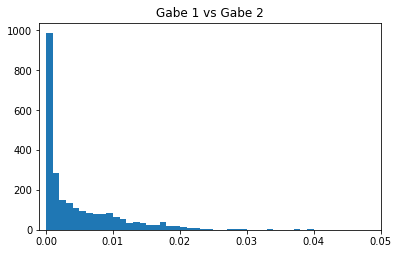

In [7]:
# plt.title("Distribution of differences between runs, normalized by CVAP")
fig, ax = plt.subplots(figsize=(6,4))
fig.tight_layout(pad=3.0)
data = [proportions]
titles = ['Gabe 1 vs Gabe 2']
for i in range(1):
    ax.set_title(titles[i])
    ax.set_xlim(-0.001, 0.05)
    ax.hist(data[i], bins=np.arange(0,0.06, 0.001))

plt.show()
plt.savefig(compa)